# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the appropriate libraries with aliases
# Create two new dataframes
northCC = pd.read_csv(r'C:\Users\willm\Desktop\launchcode\call-center-cleanup-assignment\NorthCallCenter.csv')
southCC = pd.read_csv(r'C:\Users\willm\Desktop\launchcode\call-center-cleanup-assignment\SouthCallCenter.csv')



In [2]:

pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)

display(northCC)
display(southCC)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [3]:
# EDA Question 1A solution below:
northCC['Rep ID'].dropna().nunique()

# There are 9 unique Rep IDs in the North Branch.

9

#### EDA Question 1B:  How many reps are in the South branch?  

In [4]:
# EDA Question 1B solution Below:
southCC["Rep ID"].dropna().nunique()

# There are 11 unique Rep IDs in the South Branch

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [5]:
# EDA Question 2B solution Below:
numericnorth = northCC.select_dtypes(include='number')

avgnorth = numericnorth.agg('mean')
display(avgnorth)

# Average 'busy minutes' is 9.99. Average 'not ready minutes' is 1.91.
# Average 'incoming wait time' is 3.05 minutes. Average 'during call wait time' is 2.97 minutes.


Unnamed: 0               122.000000
Lost Call                  0.020408
Abandoned                  0.028571
Busy Minutes               9.987755
Not Ready Minutes          1.914286
Incoming Wait Time         3.048780
During Call Wait Time      2.967347
Calls                      1.000000
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [6]:
# EDA Question 2B solution Below:
numericsouth = southCC.select_dtypes(include='number')

avgsouth = numericsouth.agg('mean')
display(avgsouth)

# Average 'busy minutes' is 10.05. Average 'not ready minutes' is 1.91.
# Average 'incoming wait time' is 3.00 minutes. Average 'during call wait time' is 3.08 minutes.


Unnamed: 0               156.500000
Lost Call                  0.035032
Abandoned                  0.012739
Busy Minutes              10.054140
Not Ready Minutes          1.910828
Incoming Wait Time         3.000000
During Call Wait Time      3.076433
Calls                      1.000000
dtype: float64

In [7]:
descN = numericnorth.describe()
descS = numericsouth.describe()

print(descN)
print(descS)

       Unnamed: 0   Lost Call   Abandoned  Busy Minutes  Not Ready Minutes  \
count  245.000000  245.000000  245.000000    245.000000         245.000000   
mean   122.000000    0.020408    0.028571      9.987755           1.914286   
std     70.869599    0.141681    0.166940      1.403980           0.771416   
min      0.000000    0.000000    0.000000      8.000000           1.000000   
25%     61.000000    0.000000    0.000000      9.000000           1.000000   
50%    122.000000    0.000000    0.000000     10.000000           2.000000   
75%    183.000000    0.000000    0.000000     11.000000           3.000000   
max    244.000000    1.000000    1.000000     12.000000           3.000000   

       Incoming Wait Time  During Call Wait Time  Calls  
count           82.000000             245.000000  245.0  
mean             3.048780               2.967347    1.0  
std              1.456382               0.843827    0.0  
min              1.000000               2.000000    1.0  
25%    

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [8]:
# EDA Question 3 solution Below:

groupednorth = northCC.groupby('Time Block')['Calls'].sum()

groupedsouth = southCC.groupby('Time Block')['Calls'].sum()

groupedtotal = groupednorth.add(groupedsouth, fill_value=0)

print(groupedtotal)


Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [9]:
# Question 1 solution below

print(northCC.isnull().sum())
print(southCC.isnull().sum())

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64
Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64


#### Record your answer below:

> Your Answer: There is data missing in the Incoming Wait Time column. Originally I used .fillna(0, inplace=True) to replace all NaN values with 0. However this changed the Incoming Wait Time data manipulation to significantly reduce the average. I believe we should leave the NaN values alone so as not to skew the average, and assume that the data was not recorded.

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [10]:
# Cleaning Question 2 solution below:

print(northCC['Sale'].unique())


['NO' 'YES ' 'YES']


In [11]:
northCC['Sale'].str.rstrip()

0      NO
1      NO
2      NO
3      NO
4      NO
       ..
240    NO
241    NO
242    NO
243    NO
244    NO
Name: Sale, Length: 245, dtype: object

##### Record your answer by below:
> Your Answer: I looked for unique values in the column "Sale". It found three results ('NO', 'YES', and 'YES ') when there should only be two. The third result was because of the trailing whitespace. So I used .rstrip() to remove the whitespace, and now there are only two options.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [12]:
# Cleaning Question 3 solution below:

northdupes = northCC[northCC.duplicated()]
southdupes = southCC[southCC.duplicated()]

print(northdupes)
print(southdupes)

Empty DataFrame
Columns: [Unnamed: 0, Branch, Call Purpose, Time Block, Incoming or Outgoing, Queue, Rep ID, Sale, Lost Call, Abandoned, Busy Minutes, Not Ready Minutes, Incoming Wait Time, During Call Wait Time, Calls]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, Branch, Call Purpose, Time Block, Incoming or Outgoing, Queue, Rep ID, Sale, Lost Call, Abandoned, Busy Minutes, Not Ready Minutes, Incoming Wait Time, During Call Wait Time, Calls]
Index: []


##### Record your answer below:
> Your Answer: There are no duplicates, but if there had been I would have used the .drop_duplicates() function on each dataframe.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [13]:
# Cleaning Question 4 solution below:
northCC.drop(columns=['Unnamed: 0'], inplace=True)
southCC.drop(columns=['Unnamed: 0'], inplace=True)

##### Record your answer below:
> Your Answer: 'Unnamed: 0' was just a duplicate of the index,. I dropped the column from the dataset by using the .drop function.

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [14]:
# Create dataframe for the entire company named df

df = pd.concat([northCC,southCC])
df.reset_index(inplace=True)

# df.reset_index(drop=True)

print(df)

     index Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
0        0  North        Complaint    9:00 AM             Incoming     B   
1        1  North    Sales Support   11:00 AM             Incoming     A   
2        2  North    Sales Support   11:00 AM             Incoming     B   
3        3  North    Sales Support    4:00 PM             Incoming     B   
4        4  North  Product Support   12:00 PM             Incoming     B   
..     ...    ...              ...        ...                  ...   ...   
554    309  South  Product Support    5:00 PM             Outgoing     D   
555    310  South  Product Support    5:00 PM             Outgoing     C   
556    311  South  Product Support    5:00 PM             Outgoing     C   
557    312  South  Product Support    5:00 PM             Outgoing     C   
558    313  South  Product Support    5:00 PM             Outgoing     D   

     Rep ID Sale  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
0     Brent 

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [15]:
# Manipulation Question solution below:

grouped = df.groupby(['Branch', 'Rep ID'])['Calls'].sum()
print(grouped)

Branch  Rep ID
North   Amanda    23
        Andy      23
        Brent     37
        Cam       24
        Duke      29
        Joe       26
        Lilly     30
        Todd      29
        Xander    24
South   Alice     20
        Eric      35
        George    29
        Helga     31
        Josh      26
        Karl      28
        Kate      29
        Randy     33
        Sandy     32
        Sharon    25
        Susan     26
Name: Calls, dtype: int64


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent (37)
- South Branch = Eric (35)

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [16]:
# Manipulation Question 2 solution below:
abandon = df['Abandoned'].mean()
print(abandon)
abandonN = northCC['Abandoned'].mean()
print(abandonN)
abandonS = southCC['Abandoned'].mean()
print(abandonS)


0.01967799642218247
0.02857142857142857
0.012738853503184714


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 0.029
- South Branch = 0.013
- Company Wide = 0.020
- Do any of these fall out of the optimal range of 2-5%?             No, they are all within the optimal range

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [17]:
# Manipulation Question 3 solution below:

serviceN = northCC['Calls'][(northCC['Incoming Wait Time'] <= 2)].sum()

serviceS = southCC['Calls'][(southCC['Incoming Wait Time'] <= 2)].sum()

service_total = df['Calls'][(df['Incoming Wait Time'] <= 2)].sum()

print(serviceN)
print(serviceS)
print(service_total)

totalN = northCC[(northCC['Incoming or Outgoing'] == 'Incoming')]['Calls'].sum()
totalS = southCC[(southCC['Incoming or Outgoing'] == 'Incoming')]['Calls'].sum()
total_calls = df[(df['Incoming or Outgoing'] == 'Incoming')]['Calls'].sum()

percN = (serviceN/totalN)*100
percS = (serviceS/totalS)*100
total_perc = (service_total/total_calls)*100

print(percN)
print(percS)
print(total_perc)


33
48
81
40.243902439024396
38.095238095238095
38.94230769230769


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 33 total calls, 40.24%
- South Branch = 48 total calls, 38.10%
- Company Wide = 81 total calls, 38.94%

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [18]:
# Manipulation Question 4 solution below:
speed_avgN = northCC['Incoming Wait Time'].mean()
speed_avgS = southCC['Incoming Wait Time'].mean()
speed_avg_total = df['Incoming Wait Time'].mean()


print(speed_avgN)
print(speed_avgS)
print(speed_avg_total)


3.048780487804878
3.0
3.019230769230769


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 seconds
- South Branch in seconds = 3.00 seconds
- Company Wide in seconds = 3.02 seconds

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

C:\Users\willm\AppData\Local\Temp\ipykernel_38144\4192806046.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = (queue_dict["Abandoned"][i] / queue_dict["Calls"][i] )*100


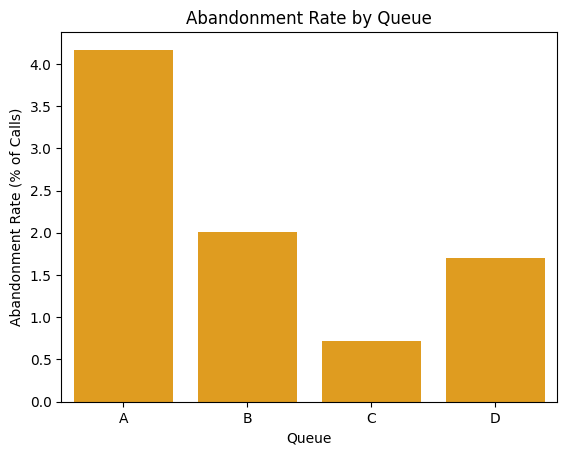

In [19]:
# Create visualization 1 here
# Import any additional libraries needed with alias

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = (queue_dict["Abandoned"][i] / queue_dict["Calls"][i] )*100

#Your code below:
abandon_df = pd.DataFrame(list(abandonment_rates.items()), columns = ['Queue', 'Abandoned'])
sns.barplot(abandon_df, x='Queue', y='Abandoned', orient='x', color='orange')
plt.ylabel('Abandonment Rate (% of Calls)')
plt.title('Abandonment Rate by Queue')
plt.show()

##### Record your answer below:

> Chart style you chose and why: I chose a bar chart because we are comparing the abandonment values for 4 different queues. Bar charts are the most effective graphical representation of comparison.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

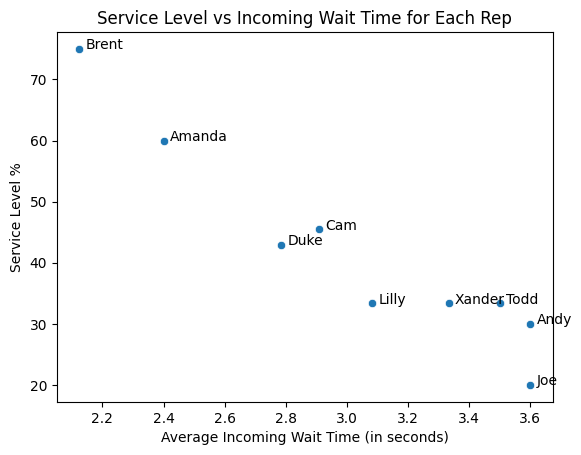

In [20]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = northCC.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = northCC[northCC["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = northCC[northCC["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
service_table = pd.merge(service_level, north_plt, on='Rep ID')



sns.scatterplot(service_table, x='Incoming Wait Time', y='Service Level %')
for i, txt in enumerate(service_table['Rep ID']):
    plt.annotate(txt, (((service_table['Incoming Wait Time'][i])+.02), service_table['Service Level %'][i]))
plt.title('Service Level vs Incoming Wait Time for Each Rep')
plt.xlabel('Average Incoming Wait Time (in seconds)')
plt.show()


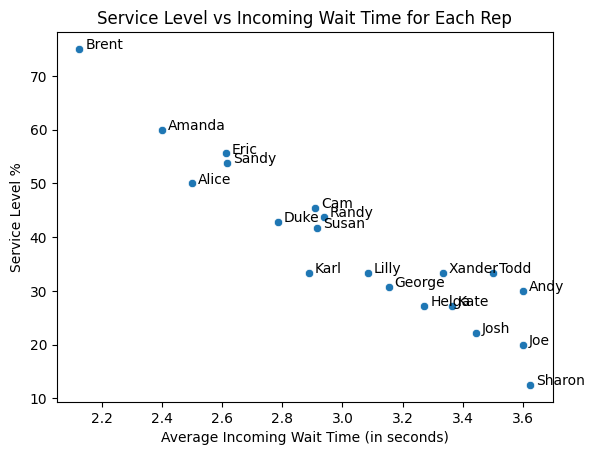

In [21]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

df_plt = df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = df[df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = df[df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
service_table = pd.merge(service_level, df_plt, on='Rep ID')



sns.scatterplot(service_table, x='Incoming Wait Time', y='Service Level %')
for i, txt in enumerate(service_table['Rep ID']):
    plt.annotate(txt, (((service_table['Incoming Wait Time'][i])+.02), service_table['Service Level %'][i]))
plt.title('Service Level vs Incoming Wait Time for Each Rep')
plt.xlabel('Average Incoming Wait Time (in seconds)')
plt.show()


##### Record your answer below:

> Chart style you chose and why:
> 
> I chose a scatterplot because we had two variables we are measuring. This allowed us to compare how the average incoming wait time correlated with each employee's Service Level %.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

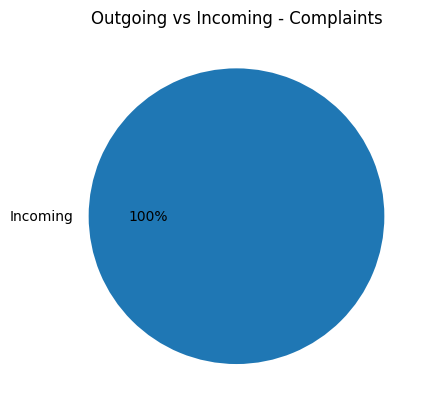

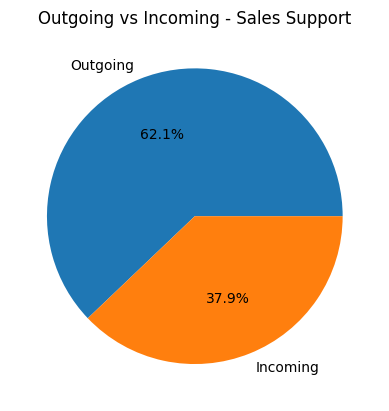

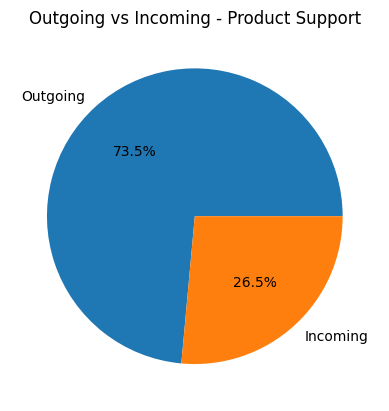

In [22]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
# print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()



#Your Code Here:
plt.pie(complaints.values(), labels=complaints.keys(), autopct='%1.0f%%')
plt.title('Outgoing vs Incoming - Complaints')
plt.show()
plt.pie(sales_support.values(), labels=sales_support.keys(), autopct='%1.1f%%')
plt.title('Outgoing vs Incoming - Sales Support')
plt.show()
plt.pie(product_support.values(), labels=product_support.keys(), autopct='%1.1f%%')
plt.title('Outgoing vs Incoming - Product Support')
plt.show()

##### Record your answer below:

> Chart style you chose and why:
>
> We needed to represent the pieces of the whole, that is how many belonged the groups 'outgoing' and 'incoming' out of all calls made. Pie charts are excellent at representing parts of wholes.

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer:
>
> It appears as though the South Branch is operating more efficiently. They have a lower abandonment rate (North: 2.9%, South: 1.3%) and faster average answer speed (North: 3.05 seconds, South: 3.00 seconds). South has a slightly lower service level (North: 40.2%, South: 38.1%), but this makes sense given that there are more calls per employee on average at (North: 27.2 calls/rep, South: 28.5 calls/rep). It is possible (though not provable through the data shown here) that they are better able to handle the call volume during peak call times due to the fact that they have more employees (9 at North, 11 at South).

#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: I think the North branch would benefit the most from the extra help.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: It would be nice to have some customer feedback, to get a sense for how the current staffing affects customers' perceived relationship with the company.


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

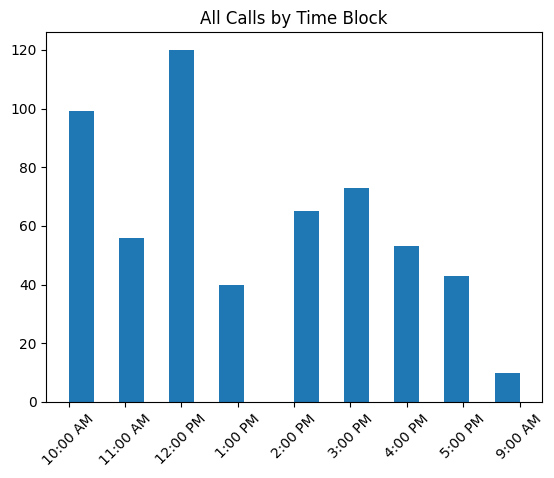

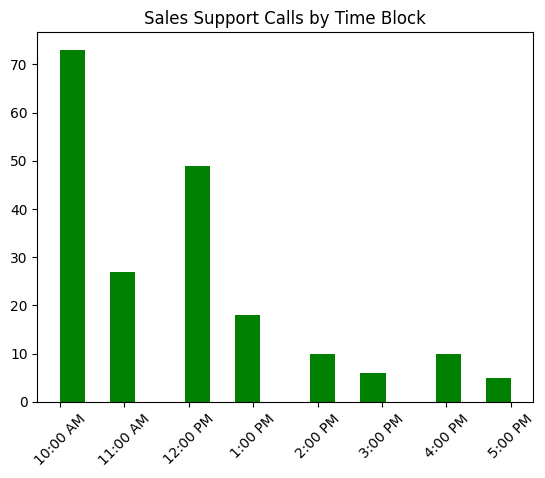

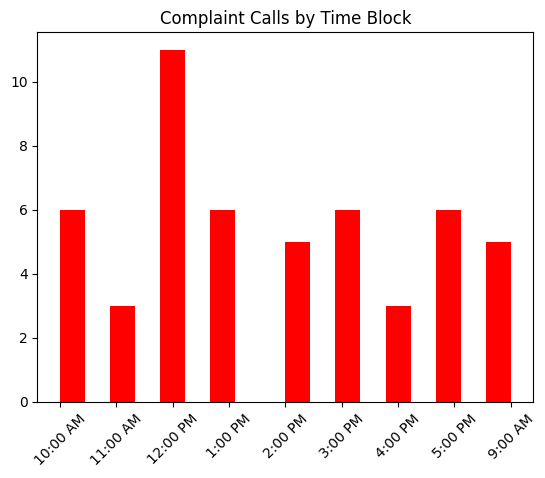

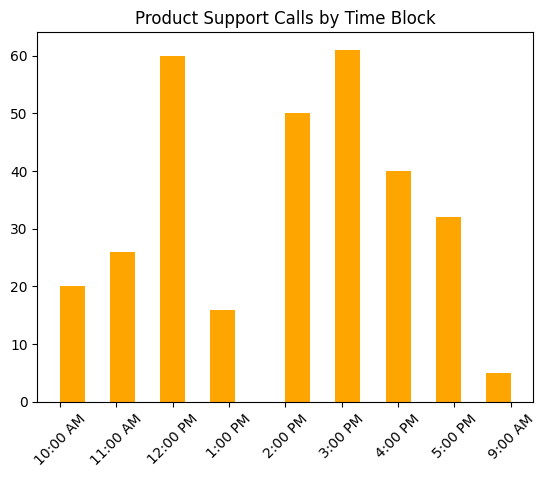

In [40]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]].sort_values(by='Time Block')

# Use groupby to plot based on time blocks:
# call_grouped = call_times.groupby('Time Block')

plt.hist(call_times['Time Block'], bins=18)
plt.xticks(rotation=45)
plt.title('All Calls by Time Block')
plt.show()

# Use groupby and get_group to select which call purpose to plot:

sales_times = call_times[(call_times['Call Purpose'] == 'Sales Support')]
complaint_times = call_times[(call_times['Call Purpose'] == 'Complaint')]
product_times = call_times[(call_times['Call Purpose'] == 'Product Support')]

plt.hist(sales_times['Time Block'], bins=18, color = 'green')
plt.xticks(rotation=45)
plt.title('Sales Support Calls by Time Block')
plt.show()

plt.hist(complaint_times['Time Block'], bins=18, color='red')
plt.xticks(rotation=45)
plt.title('Complaint Calls by Time Block')
plt.show()

plt.hist(product_times['Time Block'], bins=18, color='orange')
plt.xticks(rotation=45)
plt.title('Product Support Calls by Time Block')
plt.show()